# Limitations of Stationarity Tests

- some tests may mistake non-stationary series (sine with noise) as stationary around a constant
- cyclical/seasonal movements of the mean are difficult to tell apart from random noise
- important to check by eye and think about the underlying factors

## Sine + noise (mistaking non-stationarity for stationarity)

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
plt.style.use("seaborn-whitegrid")

In [8]:
# create stationary signal
range = np.arange(100)
noise = np.random.randn(100)
sine = 2*np.sin(range)
signal = sine + noise

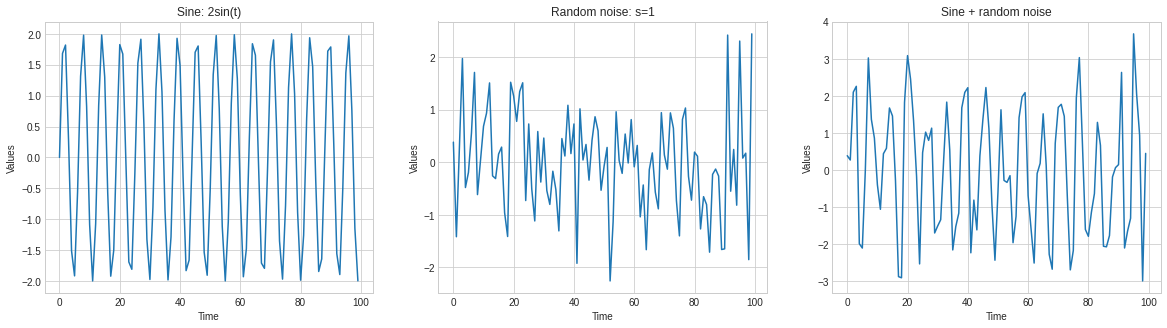

In [9]:
# plot sine, noise, and signal
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].set_title("Sine: 2sin(t)")
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Values')
axes[0].plot(sine)

axes[1].set_title("Random noise: s=1")
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Values')
axes[1].plot(noise)

axes[2].set_title("Sine + random noise")
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Values')
axes[2].plot(signal)

plt.show()

### ADF Test ($H_0$: non-stationary)

In [10]:
# ADF test 
result_adf = adfuller(signal, autolag="AIC")

statistic = result_adf[0]
p_value = result_adf[1]
used_lag = result_adf[2]
nobs = result_adf[3]
critical_values = result_adf[4]
icbest = result_adf[5]

print(" > Is the data stationary ?")
print(f'ADF Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {used_lag}')
print('Critial Values:')

for key, value in critical_values.items():
    print(f'   {key}, {value}')  

print(f'\nResult: The series is likely {"not " if p_value > 0.05 else ""}stationary')

 > Is the data stationary ?
ADF Statistic: -3.894919831902928
p-value: 0.0020725540838127765
num lags: 9
Critial Values:
   1%, -3.505190196159122
   5%, -2.894232085048011
   10%, -2.5842101234567902

Result: The series is likely stationary


### KPSS Test around constant ($H_0$: stationary)

In [11]:
# KPSS test around constant
result_kpss_c = kpss(signal, regression="c")

statistic = result_kpss_c[0]
p_value = result_kpss_c[1]
n_lags = result_kpss_c[2]
critical_values = result_kpss_c[3]

print(" > Is the data stationary ?")
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

for key, value in critical_values.items():
  print(f'   {key} : {value}')
  
print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a constant')

 > Is the data stationary ?
KPSS Statistic: 0.4425575656402179
p-value: 0.05881139412059573
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Result: The series is likely stationary around a constant


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


### KPSS Test around trend ($H_0$: stationary)

In [12]:
# KPSS test around trend
result_kpss_ct = kpss(signal, regression="ct")

statistic = result_kpss_ct[0]
p_value = result_kpss_ct[1]
n_lags = result_kpss_ct[2]
critical_values = result_kpss_ct[3]

print(" > Is the data stationary ?")
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

for key, value in critical_values.items():
  print(f'   {key} : {value}')
  
print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a trend')

 > Is the data stationary ?
KPSS Statistic: 0.1165721892658257
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216

Result: The series is likely stationary around a trend


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
